In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

# local imports
import utils as ut
import plotting as plt2

sc.settings.verbosity = 3  

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_landscape.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 9.05 GB, difference +9.05 GB


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs['cell_label'].value_counts()

cell_label
Fibroblast                              26586
Reprogrammed Cells                       8574
Lineage Negative (CD34Pos/CD164Pos)      6343
Hematopoietic Stem Cell                  5798
Lineage Negative (CD34low/CD164high)     4265
Multipotent Progenitor                   1795
Megakaryocyte-Erythroid Progenitor        863
Multi-Lymphoid Progenitor                 123
Name: count, dtype: int64

In [4]:
adata.obs['cluster_str'].value_counts()

cluster_str
D1     7630
D2     6686
D3     6298
D4     5274
D5     4496
D6     4481
D7     3001
D8     2795
D9     2729
D10    2580
D11    1546
D12    1318
D13    1199
D14    1007
D15     873
D16     725
D17     704
D18     445
D19     318
D20     190
D21      52
Name: count, dtype: int64

# UMAP based on PAGA

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:06)


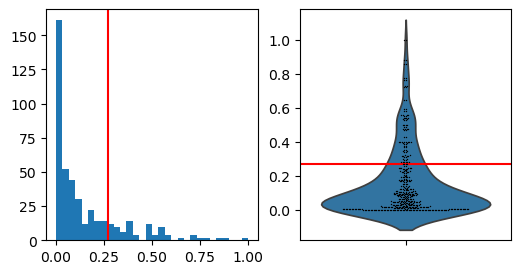

In [5]:
quantile = 0.80
group = 'cluster_str'
# group = 'cell_label'

sc.tl.paga(
    adata, 
    groups=group,
)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
paga_conn = adata.uns["paga"]["connectivities"].toarray().ravel()
a = axs[0].hist(paga_conn, bins=30)
sns.violinplot(paga_conn, ax=axs[1], inner=None)
sns.swarmplot(paga_conn, ax=axs[1], color="k", size=1)
thr = np.quantile(paga_conn, q=quantile)
_ = axs[1].axhline(thr, c="r")
_ = axs[0].axvline(thr, c="r")

--> added 'pos', the PAGA positions (adata.uns['paga'])


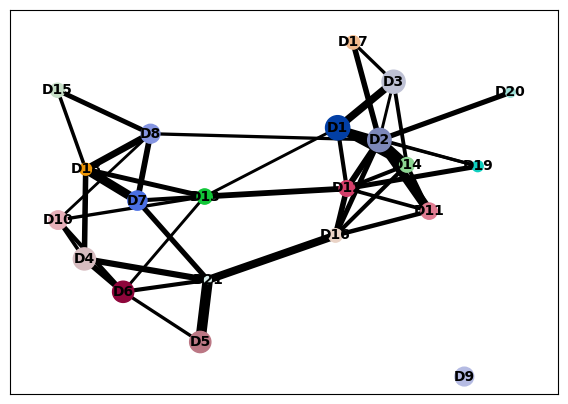

computing UMAP


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:21)


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2', 'nUMAP 1', 'nUMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap', 'paga', 'cluster_str_sizes', 'cluster_str_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [6]:
sc.pl.paga(
    adata,
    threshold=thr,
)

sc.tl.umap(
    adata, 
    init_pos='paga',
    min_dist=0.35,
    spread=10,
)

adata.obs['nUMAP 1'] = adata.obsm['X_umap'][:, 0]
adata.obs['nUMAP 2'] = adata.obsm['X_umap'][:, 1]

adata

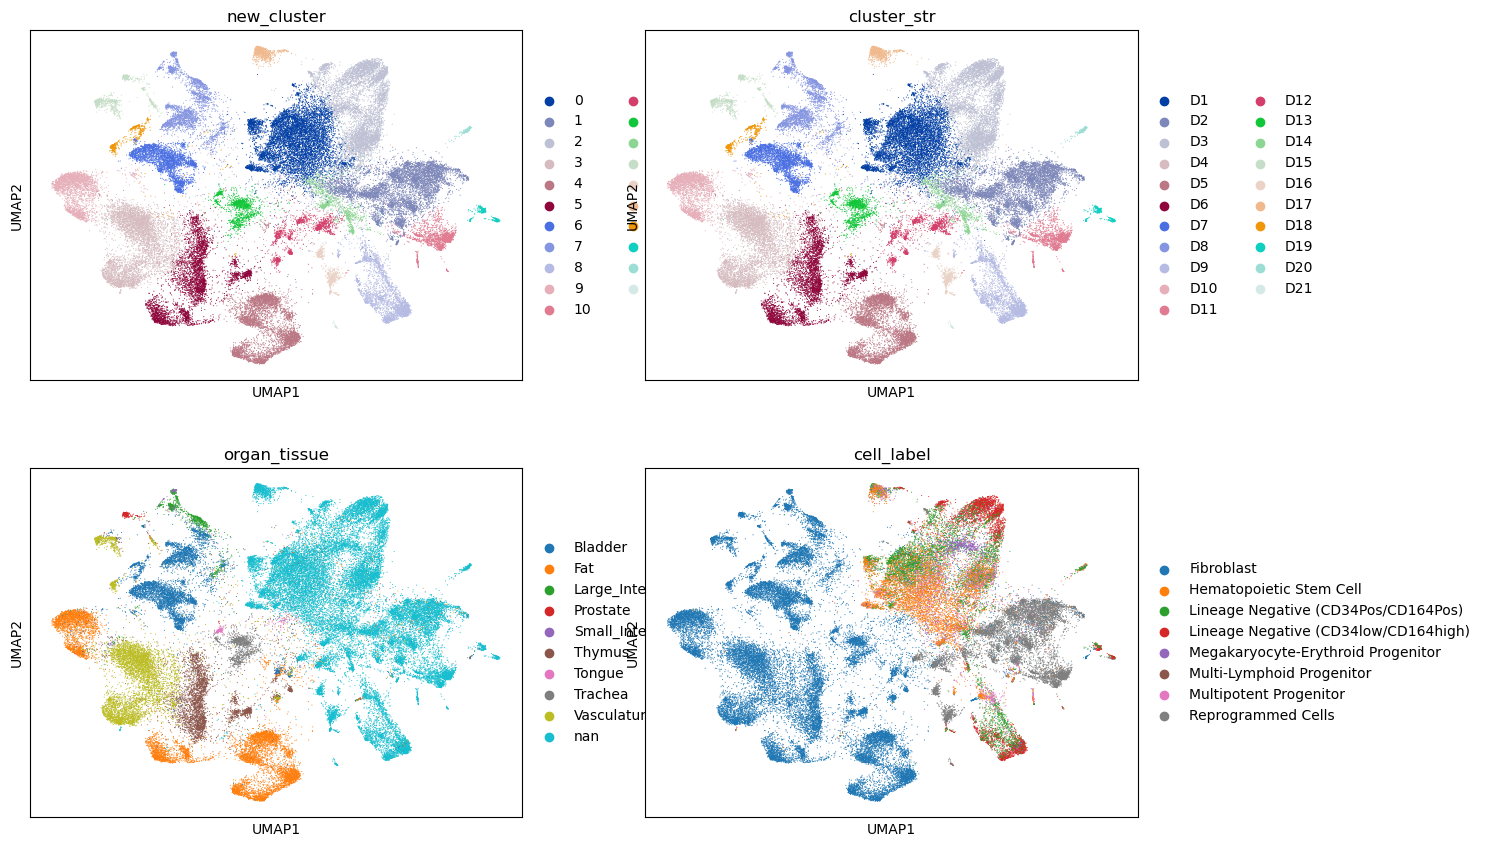

In [7]:
sc.pl.umap(
    adata,
    color=[
        'new_cluster',
        'cluster_str', 
        'organ_tissue', 
        'cell_label',
    ],
    ncols=2,
)

In [8]:
# Write this out
outpath = "/scratch/indikar_root/indikar1/shared_data/sc_HSC/scanpy/hsc_landscape_umap.h5ad"
adata.write(outpath)
adata

AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2', 'nUMAP 1', 'nUMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap', 'paga', 'cluster_str_sizes', 'cluster_str_colors', 'cell_label_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [9]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)